In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

/home/khosta/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
print(torch.__version__)

2.3.0+cu118


In [3]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()
type(iris)

sklearn.utils._bunch.Bunch

In [5]:
X = iris.data
y = iris.target
print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train.shape, y_train.shape

((120, 4), (120,))

In [9]:
X_test.shape, y_test.shape

((30, 4), (30,))

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
X_train_tensor = torch.FloatTensor(X_train)
X_test_tensor = torch.FloatTensor(X_test)
y_train_tensor = torch.LongTensor(y_train)
y_test_tensor = torch.LongTensor(y_test)

In [12]:
class NeuralNetworkClassificationModel(nn.Module):  #nn.Module must always be inherited
    def __init__(self, input_dim, output_dim):
        super(NeuralNetworkClassificationModel, self).__init__()
        self.input_layer = nn.Linear(input_dim, 128)
        self.hidden_layer1 = nn.Linear(128, 64)
        self.output_layer = nn.Linear(64, output_dim)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.relu(self.input_layer(x))
        out = self.relu(self.hidden_layer1(out))
        out = self.output_layer(out)
        return out


In [13]:
input_dim = 4
output_dim = 3
model = NeuralNetworkClassificationModel(input_dim, output_dim)
print(model)

NeuralNetworkClassificationModel(
  (input_layer): Linear(in_features=4, out_features=128, bias=True)
  (hidden_layer1): Linear(in_features=128, out_features=64, bias=True)
  (output_layer): Linear(in_features=64, out_features=3, bias=True)
  (relu): ReLU()
)


In [14]:
learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [15]:
def train_network(model, optimizer, criterion,
                  X_train, y_train,X_test, y_test, num_epochs, 
                  train_losses, test_losses):
    for epoch in range(num_epochs):
        #Training mode
        model.train()

        # 1. Forward Pass
        y_preds = model(X_train)

        # 2. Compute Loss
        loss_train = criterion(y_preds, y_train)

        # 3. Optimizer Zero Grad
        optimizer.zero_grad()

        # 4. Backpropagate
        loss_train.backward()

        # 5. Upadate the weights
        optimizer.step()

        # Testing Mode
        model.eval()

        with torch.inference_mode():
            test_preds = model(X_test)
            loss_test = criterion(test_preds, y_test)

        train_losses[epoch] = loss_train.item()
        test_losses[epoch] = loss_test.item()

        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}/{num_epochs} | Train Loss: {loss_train.item():.4f} | Test Loss: {loss_test.item():.4f}")
            


In [16]:
num_epochs = 500
train_losses = np.zeros(num_epochs)
test_losses = np.zeros(num_epochs)
train_network(model, optimizer, criterion, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, num_epochs, train_losses, test_losses)

Epoch 10/500 | Train Loss: 0.1941 | Test Loss: 0.1086
Epoch 20/500 | Train Loss: 0.0557 | Test Loss: 0.0371
Epoch 30/500 | Train Loss: 0.0400 | Test Loss: 0.0066
Epoch 40/500 | Train Loss: 0.0335 | Test Loss: 0.0044
Epoch 50/500 | Train Loss: 0.0283 | Test Loss: 0.0067
Epoch 60/500 | Train Loss: 0.0219 | Test Loss: 0.0036
Epoch 70/500 | Train Loss: 0.0149 | Test Loss: 0.0028
Epoch 80/500 | Train Loss: 0.0089 | Test Loss: 0.0031
Epoch 90/500 | Train Loss: 0.0049 | Test Loss: 0.0113
Epoch 100/500 | Train Loss: 0.0028 | Test Loss: 0.0387
Epoch 110/500 | Train Loss: 0.0017 | Test Loss: 0.0763
Epoch 120/500 | Train Loss: 0.0012 | Test Loss: 0.1118
Epoch 130/500 | Train Loss: 0.0009 | Test Loss: 0.1365
Epoch 140/500 | Train Loss: 0.0007 | Test Loss: 0.1449
Epoch 150/500 | Train Loss: 0.0006 | Test Loss: 0.1565
Epoch 160/500 | Train Loss: 0.0005 | Test Loss: 0.1649
Epoch 170/500 | Train Loss: 0.0004 | Test Loss: 0.1692
Epoch 180/500 | Train Loss: 0.0004 | Test Loss: 0.1705
Epoch 190/500 | Tra

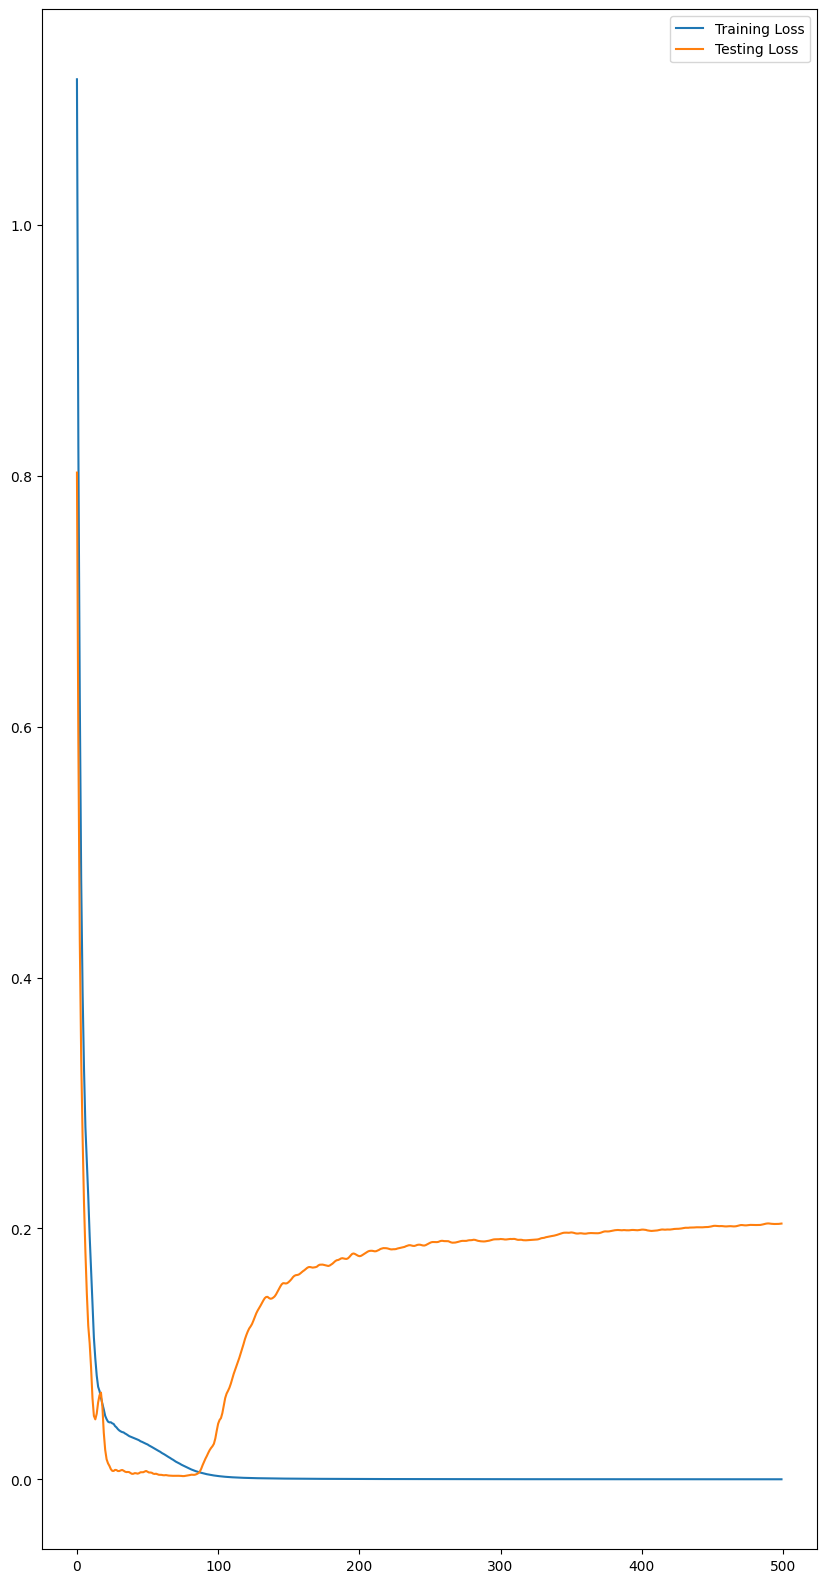

In [17]:
plt.figure(figsize=(10, 20))
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Testing Loss")
plt.legend()
plt.show()

In [18]:
from sklearn.metrics import accuracy_score, classification_report
with torch.inference_mode():
    train_preds = model(X_train_tensor)
    test_preds = model(X_test_tensor)

In [19]:
train_preds

tensor([[ 34.4515,  11.2800, -55.3036],
        [ 33.5994,  21.9418, -65.8155],
        [ -4.3026,  16.9228, -12.2478],
        [ 28.9226,  10.6683, -47.8310],
        [ 30.9424,   8.5366, -47.9873],
        [-16.1324,   1.3548,  13.6548],
        [ -3.8239,  15.5005, -11.4031],
        [ 27.7327,  12.5931, -48.4722],
        [ 30.3164,  12.3652, -51.4330],
        [ 34.6399,  15.8300, -60.7473],
        [-14.3841,   1.2782,  12.2952],
        [ -0.5625,  14.4764, -13.9472],
        [ -6.3495,  14.4258,  -7.9420],
        [ 29.6679,  16.3800, -54.9415],
        [ 28.4605,  14.4794, -51.4687],
        [ -4.3735,  16.3238, -11.5803],
        [-11.4771,   1.5535,   8.9468],
        [-12.6388,  -0.7978,  12.6184],
        [ -5.3407,  15.9207, -10.2144],
        [-15.5061,  -2.6650,  17.2160],
        [ -3.2980,  16.1763, -12.3043],
        [-20.6594,  -8.2528,  27.3512],
        [ -4.4117,  15.5899, -10.5649],
        [ 28.7580,  12.3417, -49.4481],
        [-22.2921, -10.3730,  30.8067],


In [20]:
train_preds = train_preds.numpy()
test_preds = test_preds.numpy()
final_train_preds = []
final_test_preds = []
for i in range(len(train_preds)):
    final_train_preds.append(np.argmax(train_preds[i]))
for i in range(len(test_preds)):
    final_test_preds.append(np.argmax(test_preds[i]))

In [21]:
print("Accuracy on Training Data ", accuracy_score(y_train, final_train_preds)* 100)
print("Accuracy on Training Data ", accuracy_score(y_test, final_test_preds)* 100)


Accuracy on Training Data  100.0
Accuracy on Training Data  96.66666666666667
